# __Lending Club Analysis (Deep Learning)__

## __pip Install Libraries__

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow
%python -m pip install --upgrade pip
%pip3 install --upgrade tensorflow
%pip install https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-0.10.0rc0-cp27-none-linux_x86_64.whl

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ----------------------------- ---------- 8.4/11.3 MB 47.5 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 33.8 MB/s  0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -------------------------------------- - 8.7/8.9 MB 44.9 MB/s eta 0:00:01
   -------------------------------------- - 8.7/8.9 MB 44.9 MB/s eta 0:00:01
   -------------------------------------- - 8.7/8.9 MB 44.9 MB/s eta 0:00:01
   -------------------------------------- - 8.7/8.9 MB 44.9 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 8.6 MB/s  0:00:01
   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   ----- ---------------------------------- 5.2/38.7 MB 45.7 MB/s eta 0:00:01
   -------------- ------------------------- 13.6/38.7 MB 35.7 MB/s eta 0:00:01
   ------------------ --------------------- 18.4/38.7 MB 29.7 MB/s eta 0:00:01
   -----------------

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


## __Import Dependencies__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## __Load Data__

In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### __Check for Missing Values__

In [6]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## __Data Pre-Processing__

In [7]:
df_encoded = pd.get_dummies(df, columns=['purpose'], drop_first=True)

### __Remove highly correlated features__

In [8]:
correlation_matrix = df_encoded.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
df_reduced = df_encoded.drop(columns=to_drop)

### __Preprare Features and Targets__

In [9]:
X = df_reduced.drop('not.fully.paid', axis=1)
y = df_reduced['not.fully.paid']

### __Train/Test Split__

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### __Normalize Inputs__

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## __Build the Model__

In [12]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\serge\anaconda3\envs\learn311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## __Train the Model__

In [13]:
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=32,
                    validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8211 - loss: 0.4724 - val_accuracy: 0.8398 - val_loss: 0.4221
Epoch 2/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.4314 - val_accuracy: 0.8398 - val_loss: 0.4160
Epoch 3/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.4260 - val_accuracy: 0.8398 - val_loss: 0.4151
Epoch 4/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.4262 - val_accuracy: 0.8392 - val_loss: 0.4141
Epoch 5/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8383 - loss: 0.4213 - val_accuracy: 0.8387 - val_loss: 0.4127
Epoch 6/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.4193 - val_accuracy: 0.8387 - val_loss: 0.4139
Epoch 7/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8401 - loss: 0.4174 - val_accuracy: 0.8392 - val_loss: 0.4134
Epoch 8/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8408 - loss: 0.4152 - val_accuracy: 0.

#### __Key Observations and Insights__

**Training and Validation Accuracy**: 
- The model's training accuracy starts at 0.8211 and consistently improves, reaching 0.8405 by the final epoch. 

- Similarly, the validation accuracy shows slight fluctuations but stays within a narrow range, starting at 0.8398 and ending at 0.8372. 


**Training and Validation Loss**: 
- The training loss steadily decreases from 0.4724 to 0.4066, suggesting the model is reducing its error on the training set. 

- The validation loss also decreases from 0.4221 to 0.4064, which is a positive sign that the model's performance is improving on unseen data.

**Signs of Overfitting**: 
- The gap between the training accuracy and validation accuracy is very small and relatively consistent throughout the training process. 

    - For example, in Epoch 25, the training accuracy is 0.8405 and the validation accuracy is 0.8372. 
    
    - This minimal gap suggests that the model is not overfitting to the training data. It is generalizing well to new data, which is a good outcome.

**Diminishing Returns**: 
- After the initial epochs (around Epoch 5), the improvements in both accuracy and loss become minimal. 

- The changes are very small, often in the third or fourth decimal place. 

- This suggests that the model's performance is plateauing and further training may not yield significant improvements. 

- The model may have reached its optimal performance given the current architecture and hyperparameters.

**Training Efficiency**: 
- The time per step is consistently low, mostly 1-2ms/step, indicating that the training process is efficient. 

- The time remains stable throughout, which means there are no bottlenecks or significant changes in the computational load as training progresses.

#### __Summary__

- The model shows stable and consistent performance. 

- It's learning effectively without overfitting, but the rate of improvement has slowed considerably. 

- At this point, additional training epochs are unlikely to provide much benefit.

## __Evaluate the Model__

In [14]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8372 - loss: 0.4106
Test Loss: 0.4106, Test Accuracy: 0.8372


#### __Test Result Summary__

- The model was tested over 60 steps, with each step taking 1ms. The final results for the test dataset are:

    - Test Loss: 0.4106

    - Test Accuracy: 0.8372

#### __Insights__
- The test accuracy of 0.8372 shows that the model correctly predicted the outcome for approximately 83.72% of the data in the test set.

- The test loss of 0.4106 indicates the model's error rate on this unseen data, with a lower value being better.

- These results align very closely with the validation accuracy (0.8372) and validation loss (0.4064) from the previous training logs. This strong consistency between validation and test performance indicates that the model is well-generalized and not overfitting.

## __Predict the Model__

In [15]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## __EDA__

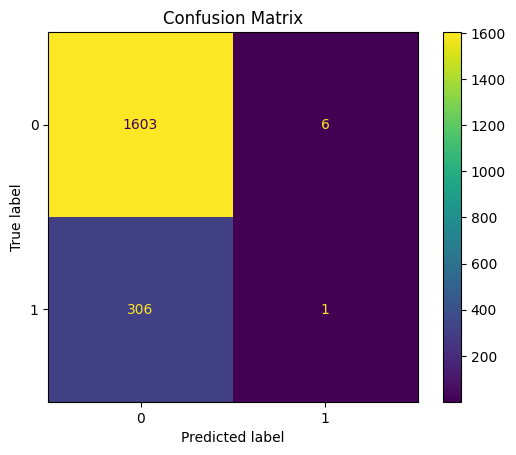

In [16]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#### __Key Observations__
True Positives (TP): The model correctly predicted 1 instance of the positive class (label 1). This is located at the intersection of "True label 1" and "Predicted label 1."

True Negatives (TN): The model correctly predicted 1603 instances of the negative class (label 0). This is located at the intersection of "True label 0" and "Predicted label 0."

False Positives (FP): The model incorrectly predicted 6 instances as positive when they were actually negative. This is a "Type I" error, found at the intersection of "True label 0" and "Predicted label 1."

False Negatives (FN): The model incorrectly predicted 306 instances as negative when they were actually positive. This is a "Type II" error, found at the intersection of "True label 1" and "Predicted label 0."

#### __Performance Insights__
The model's performance is highly imbalanced and problematic, especially for the positive class (label 1).

**High Accuracy on the Negative Class**: 
- The model is excellent at identifying the negative class, with 1603 out of 1609 instances correctly classified. 

- This suggests a high specificity.

**Poor Performance on the Positive Class**: 
- The model is very poor at identifying the positive class. It only correctly identified 1 out of 307 positive instances. 

- The high number of false negatives (306) is a major concern, indicating that the model is failing to detect the vast majority of positive cases.

**Imbalanced Data**: 
- The large disparity between the number of negative samples (1609 total) and positive samples (307 total) in the dataset is a likely cause of this poor performance. 

- The model appears to have a strong bias toward predicting the majority (negative) class.

#### __Conclusion__

The high number of false negatives suggests the model's recall for the positive class is extremely low.

### __Classification Report__

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.14      0.00      0.01       307

    accuracy                           0.84      1916
   macro avg       0.49      0.50      0.46      1916
weighted avg       0.73      0.84      0.77      1916



#### __Key Observations__

**Overall Accuracy**: 
- The model has an overall accuracy of 0.84, meaning it correctly classified 84% of the total instances. 

- While this number seems high, it can be misleading, especially with imbalanced datasets.

**Class 0 (Negative Class)**:

`Precision: 0.84`, indicating that when the model predicted class 0, it was correct 84% of the time.

`Recall: 1.00`, meaning the model correctly identified all instances of class 0. This is a perfect score and confirms the model's excellent performance on the majority class.

`F1-Score: 0.91`, which is the harmonic mean of precision and recall. This high score reflects the model's strong performance for this class.

**Class 1 (Positive Class)**:

`Precision: 0.14`, meaning that when the model predicted class 1, it was correct only 14% of the time. This is very low.

`Recall: 0.00`, meaning the model failed to correctly identify any of the actual instances of class 1. This is a critical failure.

`F1-Score: 0.01`, which is extremely low and a direct result of the near-zero recall.

**Support**: 
- The dataset is imbalanced, with 1609 instances of class 0 and only 307 instances of class 1. 

- The model's poor performance on the minority class (1) is likely due to this imbalance.

**Macro Average**: 
- The macro average for precision, recall, and f1-score is calculated by taking a simple average of the scores for each class. 

- The macro average F1-score of 0.46 is a more honest reflection of the model's true performance, as it is not skewed by the high performance on the majority class.



#### __Performance Insights__

- The classification report confirms the insights from the confusion matrix. 

- The model is an excellent predictor of the negative class but a complete failure at identifying the positive class. 

- The recall of 0.00 for class 1 is particularly concerning, as it means the model is unable to detect a single positive case. 

- The high overall accuracy is deceptive due to the imbalanced dataset and the model's bias towards the majority class.

### __Accuracy__

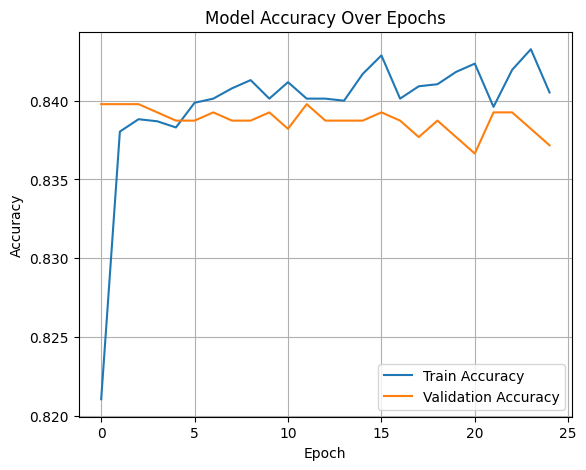

In [18]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#### __Analysis and Insights__

**Initial Learning**: 
- The model shows rapid improvement in both training and validation accuracy during the first few epochs (Epochs 0-2), where the accuracy jumps from around 0.82 to over 0.835. 

- This indicates a very quick initial learning phase.

**Plateauing and Fluctuation**: 
After the initial rapid increase, the performance of both curves plateaus and starts to fluctuate.

a. **Training Accuracy (Blue Line)**:

- This curve shows a general upward trend but with significant fluctuations, reaching its peak around Epochs 15 and 23.
        
- This suggests the model continues to learn from the training data, albeit with some instability.

b. **Validation Accuracy (Orange Line)**: 

- This curve is more stable, hovering around 0.838, with minor drops and rises. 
        
- The fact that the validation accuracy does not show a clear long-term upward trend suggests that further training beyond the initial epochs is not leading to significant improvements in the model's ability to generalize to new data.

**Overfitting**: 
- The gap between the training and validation accuracy widens slightly around Epoch 15 and beyond. 

- While both curves fluctuate, the training accuracy consistently remains higher than the validation accuracy. 

- This is a common sign of overfitting, where the model learns the training data too well, including its noise, and its performance on unseen data (validation set) starts to stagnate or even degrade.

**Conclusion**
- The model reaches its optimal performance on unseen data relatively early in the training process (around Epochs 2-5). 

- Continuing to train for 20+ more epochs does not substantially improve the model's generalization capabilities and may even lead to mild overfitting. 

- The best model would likely be the one from an earlier epoch, where the validation accuracy was highest.

### __Loss__

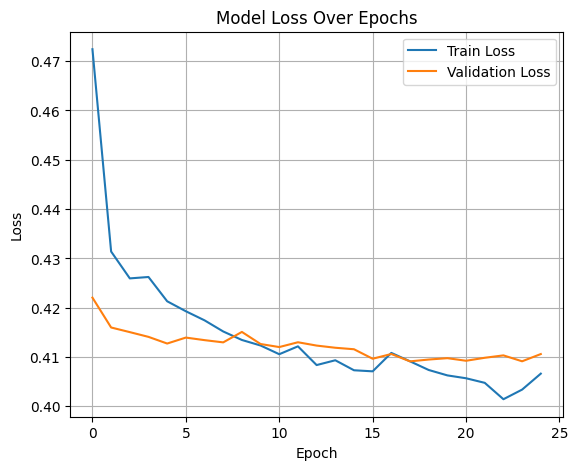

In [20]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### __Key Observations__

**Rapid Initial Decrease**: 
- Both the training and validation loss curves drop sharply during the first few epochs. 

- This indicates that the model is quickly learning and reducing its errors in the initial training phase.

**Plateauing**: 
- After Epoch 5, the rate of decrease in both curves slows significantly. 

- The loss values stabilize and fluctuate within a narrow range, suggesting that the model has likely learned most of the patterns from the data that it can.

**Minimal Overfitting**: 
- The training loss (blue line) remains consistently below the validation loss (orange line), which is expected. 

- However, the gap between the two curves is small and doesn't widen significantly over time. 

- This indicates that the model is not overfitting to the training data. 

- The model is generalizing well to new, unseen data, as the validation loss is decreasing alongside the training loss.

**Slight Increase at the End**: 
- The training loss shows a slight upward trend towards the end of the training process, while the validation loss remains relatively stable. 

- This could be a minor sign of the model's performance on the training data beginning to degrade, though the effect is small.

**Conclusion**
- The model appears to have been trained for a sufficient number of epochs. 

- Continuing to train would likely not lead to significant further reductions in either training or validation loss, as the performance has plateaued. 

- The model demonstrates good generalization and is not overfitting.

### __Save the Model__

In [22]:
model.save('loan_default_model.keras')
print("Model saved as 'loan_default_model.keras'")

Model saved as 'loan_default_model.keras'


## __Config__

In [26]:
MODEL_PATH = r"loan_default_model.keras"
DATA_PATH = r"loan_data.csv"

## __Load Model__

In [27]:
from tensorflow.keras.models import load_model

# --- Load Model ---
model = load_model(MODEL_PATH)

# --- Load CSV ---
df = pd.read_csv(DATA_PATH)

c:\Users\serge\anaconda3\envs\learn311\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## __Model Pre-Processing__

In [28]:
df_encoded = pd.get_dummies(df, columns=["purpose"], drop_first=True)

### __Remove highly correlated features__

In [30]:
correlation_matrix = df_encoded.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.9)]
df_reduced = df_encoded.drop(columns=to_drop)

### __Split Features & Targets__

In [31]:
X = df_reduced.drop("not.fully.paid", axis=1)
y = df_reduced["not.fully.paid"]

### __Normalize Inputs__

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## __Predict the Model__

In [33]:
predictions = model.predict(X_scaled)
predicted_classes = (predictions > 0.5).astype(int)

300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


## __Adding Results to Dataframe__

In [34]:
results_df = df.copy()
results_df["Predicted_Probability"] = predictions
results_df["Predicted_Class"] = predicted_classes

In [35]:
print(results_df[["not.fully.paid", "Predicted_Probability", "Predicted_Class"]].head())

   not.fully.paid  Predicted_Probability  Predicted_Class
0               0               0.121192                0
1               0               0.085456                0
2               0               0.239653                0
3               0               0.134942                0
4               0               0.077269                0


### __Save to CSV__

In [36]:
output_file = 'loan_predictions.csv'
results_df.to_csv(output_file, index=False)
print(f" Predictions saved to: {output_file}")

 Predictions saved to: loan_predictions.csv


### __Convert Notbook to HTML__

In [1]:
!jupyter nbconvert --to html "Lending Club Analysis.ipynb"

[NbConvertApp] Converting notebook Lending Club Analysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 489441 bytes to Lending Club Analysis.html
